# Data

| Name           	| Data Type  	| Measure              	| Description                 	|
|----------------	|------------	|----------------------	|-----------------------------	|
| Sex            	| nominal    	| M, F, and I (infant) 	|                             	|
| Length         	| continuous 	| mm                   	| Longest shell measurement   	|
| Diameter       	| continuous 	| mm                   	| perpendicular to length     	|
| Height         	| continuous 	| mm                   	| with meat in shell          	|
| Whole weight   	| continuous 	| grams                	| whole abalone               	|
| Shucked weight 	| continuous 	| grams                	| weight of meat              	|
| Viscera weight 	| continuous 	| grams                	| gut weight (after bleeding) 	|
| Shell weight   	| continuous 	| grams                	| after being dried           	|
| Rings          	| integer    	|                      	| +1.5 gives the age in years 	|

  

# Imports

In [121]:
import pandas as pd
import os
import numpy as np

# Notebook configurations

In [122]:
%matplotlib inline
pd.set_option("max_rows", 30)

# Graphs

In [123]:
from seaborn import set_style
set_style("darkgrid")
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych
Dane z pliku abalone.data zostały wczytane za pomocą funkcji read_csv() biblioteki pandas


In [124]:
data = pd.read_csv("data/abalone.data")

# Analiza statystyczna
Za pomocą funkcji info() otrzymałyśmy informację o braku pustych wartości we wszystkich kolumnach oraz o typie każdej z kolumn.

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 277.4+ KB


In [126]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Funkcja describe() zwróciła informację o liczbie, średniej wartości, standardowym odchyleniu, wartości minimalnej, wartości maksymalnej oraz wartościach w kwartylach dla poszczególnych kolumn. Istotna dla nas jest obserwacja zakresów atrybutów, która dla ‘Height’, ‘Whole weight’, ‘Shucked weight’, ‘Shell weight’ wykazała przekroczenie zakresu [0,1]. Liczba wartości dla wszystkich atrybutów jest równa 4177.

In [127]:
data[data.Height == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


Istnieją dwa zapisy, w których Wysokość jest równa 0, możliwe, że trudno było ją zmierzyć lub po prostu została pominięta. Niemniej jednak można to traktować jako wartość NULL, a ponieważ istnieją tylko dwa takie rekordy, najłatwiej je zignorować.

In [128]:
data = data[data.Height > 0]
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x21362B38>,
      dtype=object)

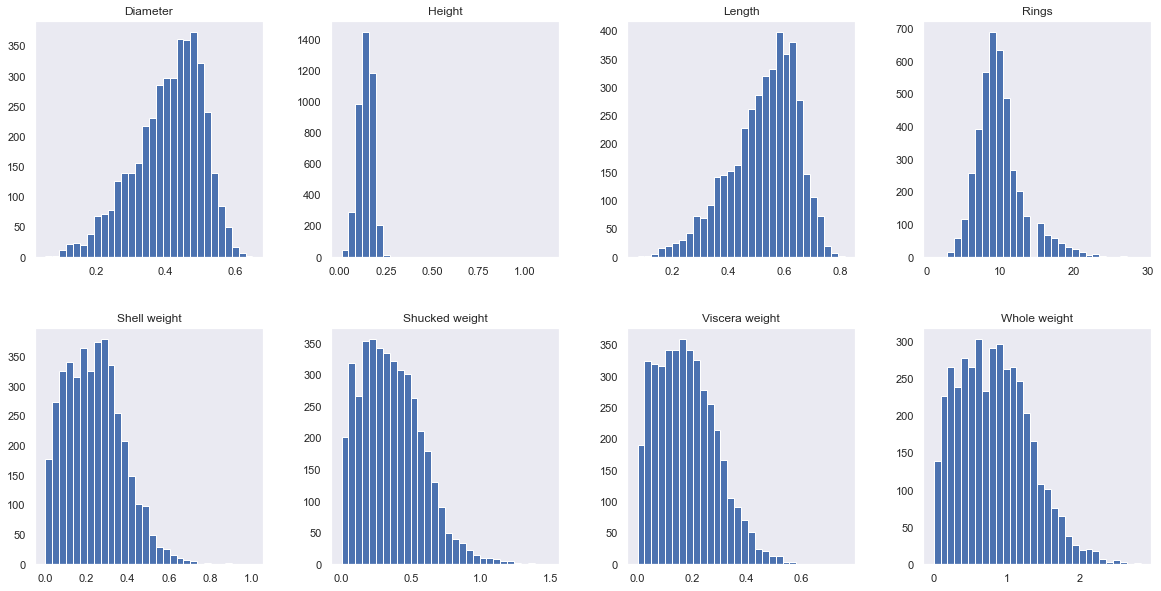

In [129]:
data.hist(figsize=(20,10), grid = False, layout=(2,4), bins = 30)

Histogramy pokazują, że dane mogą być zniekształcone, więc warto je zmierzyć.

Pokazuje również, że możliwe są wartości odstające na wysokości i że może istnieć silna zależność między średnicą a długością oraz pomiędzy Shell weight, Shucked weight ,Viscera weight i Whole weight.

# Skośność, miara asymetrii

In [130]:
from scipy import stats
from scipy.stats import norm

nf = data.select_dtypes(include=[np.number]).columns
cf = data.select_dtypes(include=[np.object]).columns

skew_list = stats.skew(data[nf])
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.165226
7,Rings,1.113354
4,Shucked weight,0.718477
6,Shell weight,0.620857
5,Viscera weight,0.591243
3,Whole weight,0.530358
1,Diameter,-0.609962
0,Length,-0.640763


Współczynnik skośności przyjmuje wartość zero dla rozkładu symetrycznego, wartości ujemne dla rozkładów o lewostronnej asymetrii (wydłużone lewe ramię rozkładu) i wartości dodatnie dla rozkładów o prawostronnej asymetrii (wydłużone prawe ramię rozkładu).

In [131]:
data.groupby("Rings").Rings.count()

Rings
1       1
2       1
3      15
4      57
5     115
6     258
7     391
8     567
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

Zostało przeprowadzone grupowanie dla kolumny ‘Rings’, aby upewnić się, że dla każdej klasy o wartościach od 1 do 29 istnieją dane w postaci pomiarów. 
Większość pierścieni leży między 3 a 22

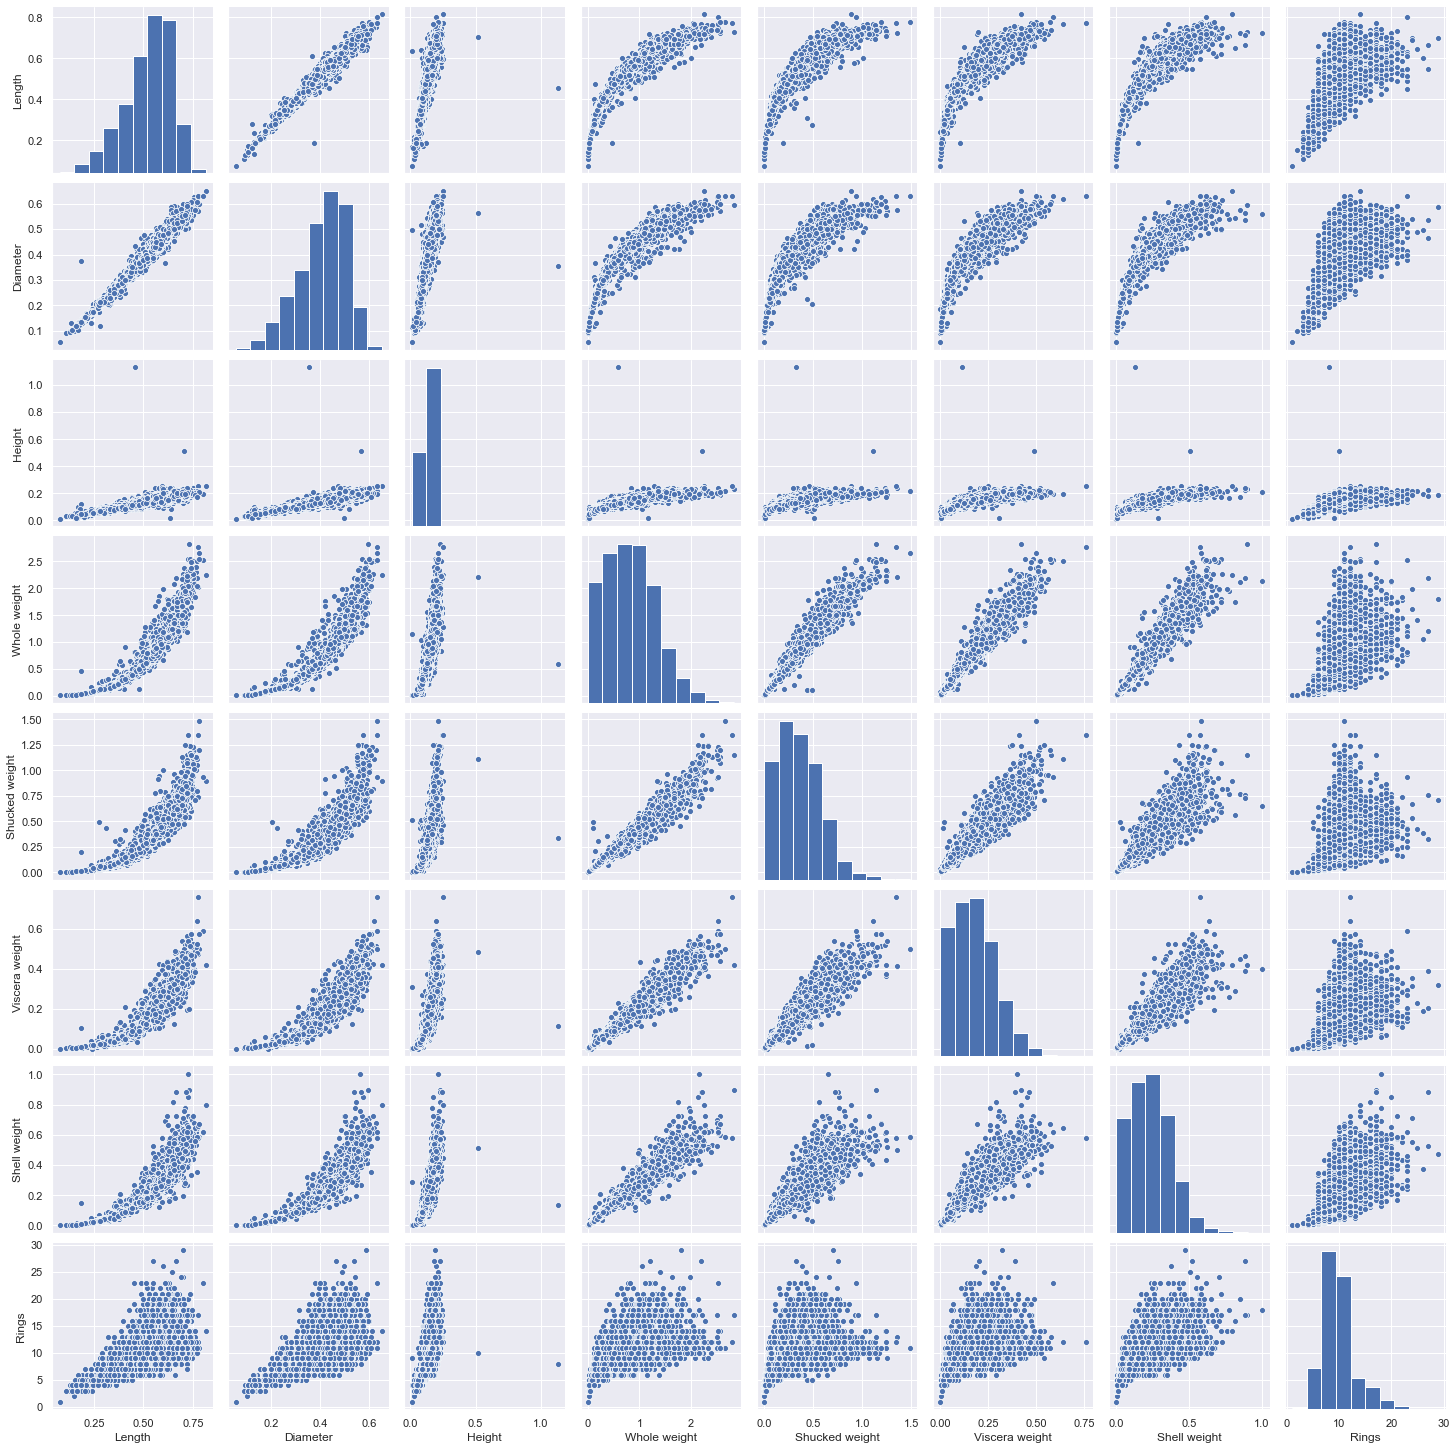

In [132]:
sns.pairplot(data)
plt.show()

Kiedy skupiamy się na rzędzie wiekowym, wzrost wydaje się mieć niewielką korelację. Ale oprócz tego inne zmienne wydają się mieć ten sam rodzaj korelacji.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


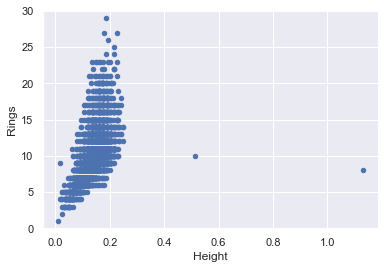

In [133]:
data1 = pd.concat([data['Rings'], data['Height']], axis = 1)
data1.plot.scatter(x='Height', y='Rings', ylim=(0,30))

Te wartości wydają się nie podążać za trendem, dlatego potraktuję je jako wartości odstające i usunę z danych.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


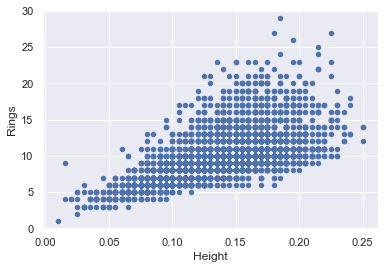

In [134]:
data = data[data.Height < 0.4]
data1 = pd.concat([data['Rings'], data['Height']], axis = 1)
data1.plot.scatter(x='Height', y='Rings', ylim=(0,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2B76D9E8>,
      dtype=object)

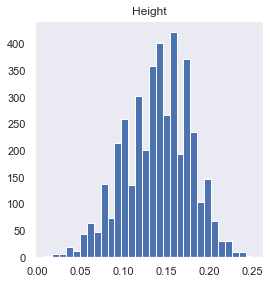

In [135]:
data.hist(column = 'Height', figsize=(20,10), grid=False, layout=(2,4), bins = 30)


Usunięte dane, jak podejrzewałyśmy, były przyczyną skośności funkcji Wysokość, teraz jest ona bliższa normalnemu rozkładowi.

# Boxplot
Wykres pudełkowy prezentuje rozkład cech, ich rozproszenie oraz wartości tj. medianę, minimum, maximum, Q1 i Q3.


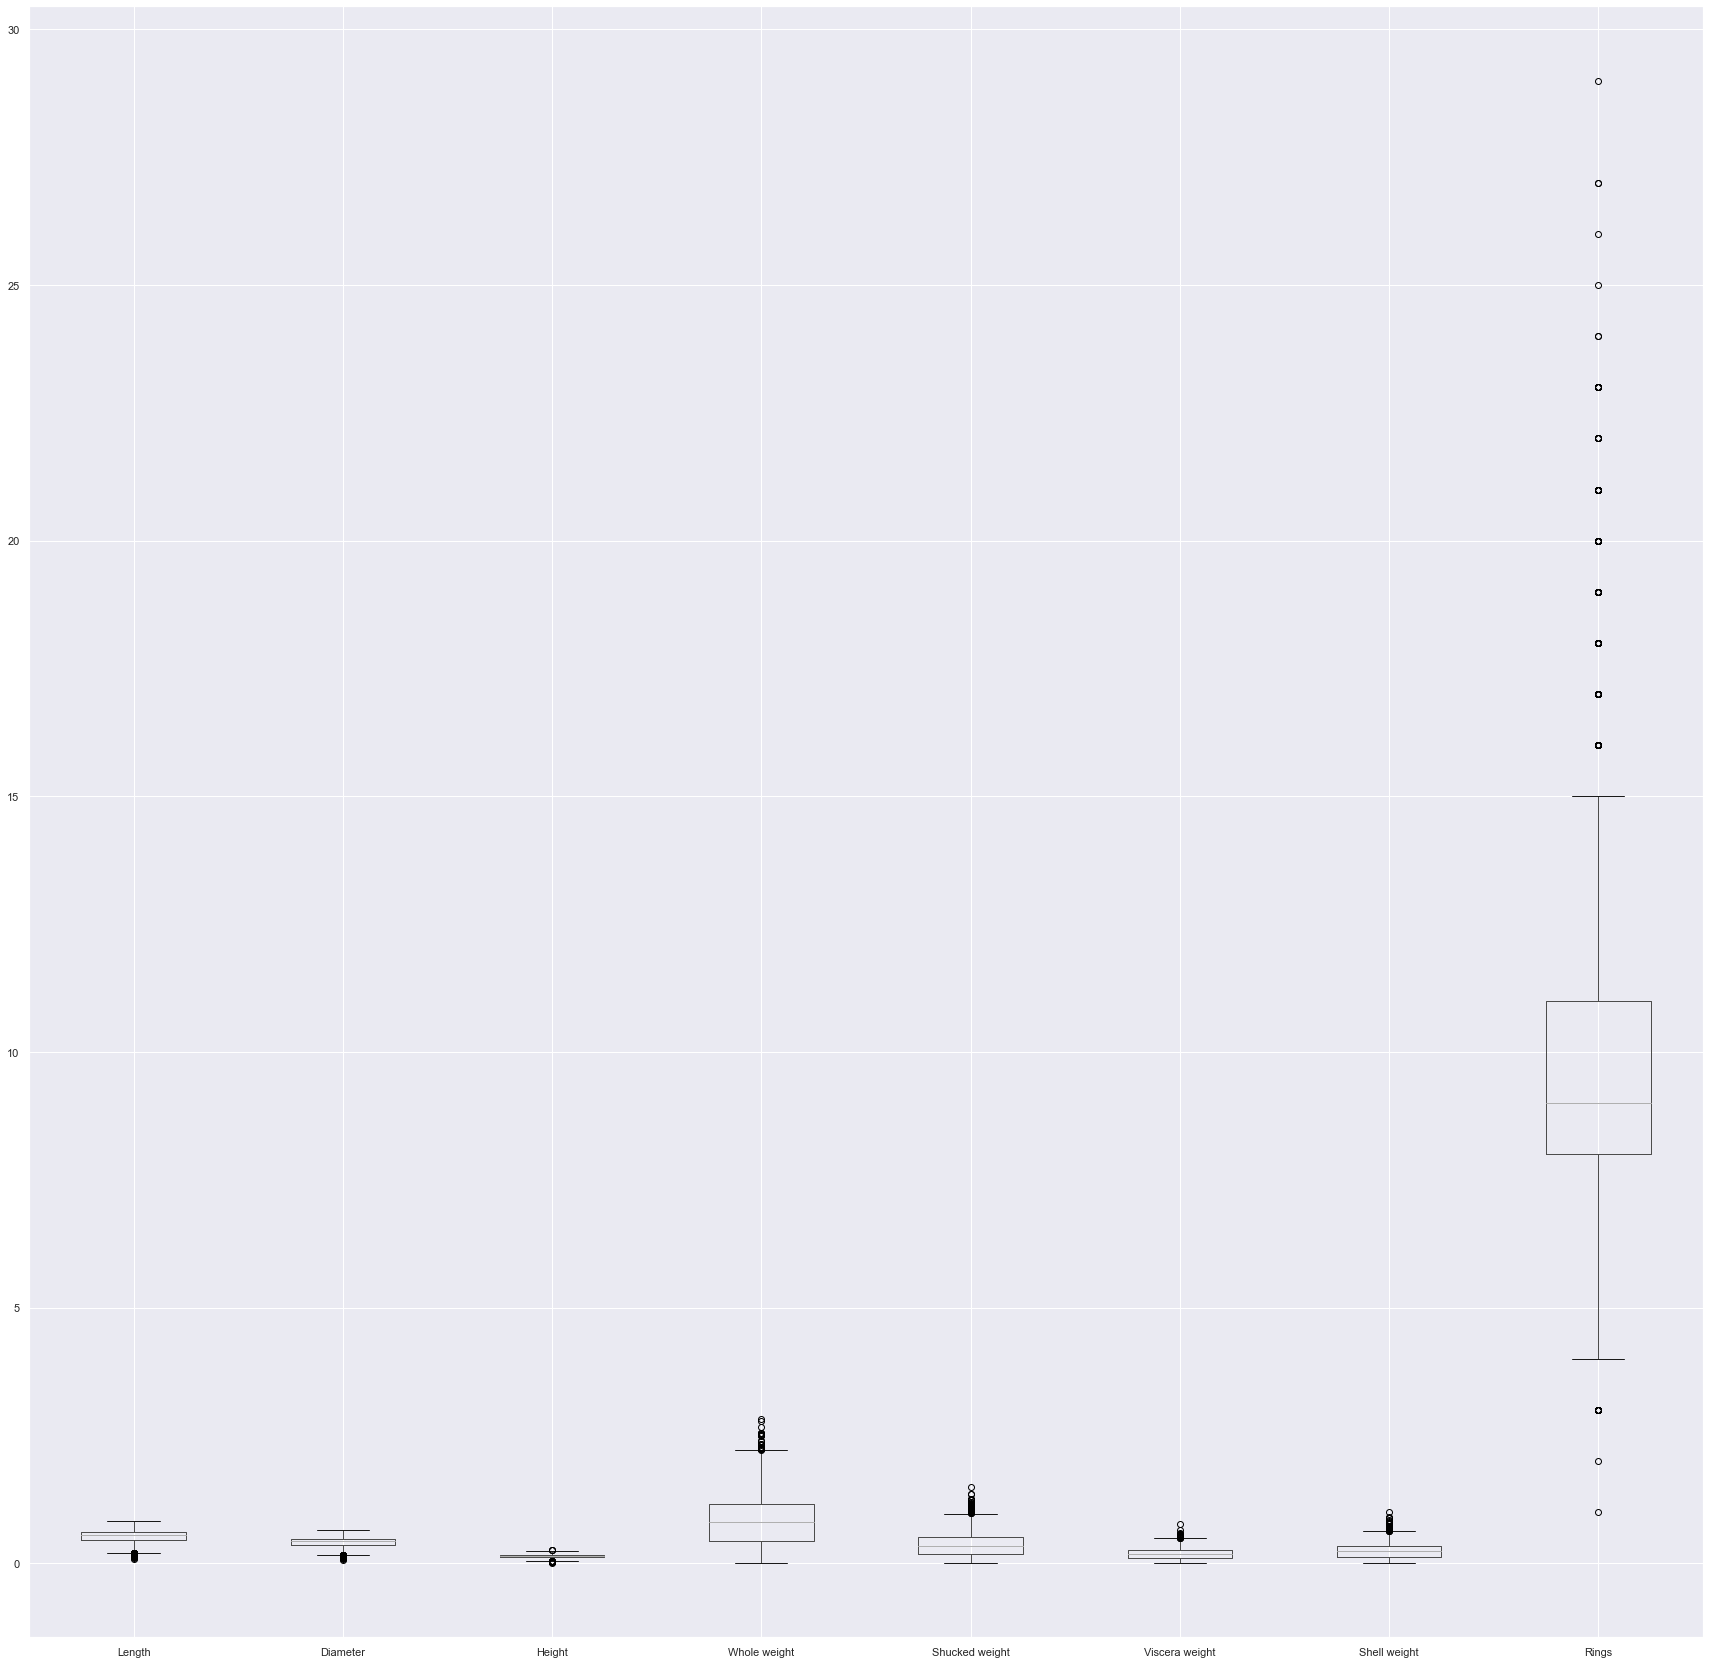

In [136]:
data.boxplot(figsize = (30, 30))

Wartośći odstające pojawiają się u każdej cechy z osoba(oprocz płci).
Symetryczna dystrybucja istnieje w Whole weight, Shucked weight, Viscera weight, Shell weight.

# Dystrybucja danych dotyczących „pierścieni”

In [137]:
sns.set(color_codes=True)

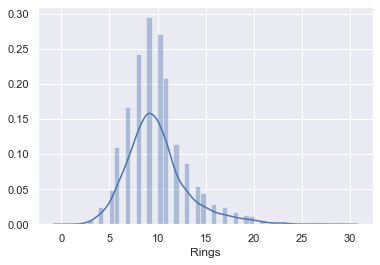

In [138]:
sns.distplot(data.Rings)

# Dystrybucja danych dotyczących „długości”

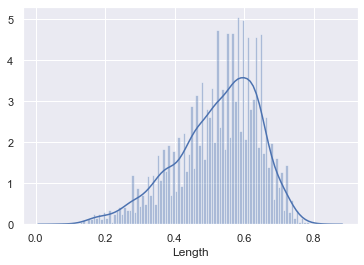

In [139]:
sns.distplot(data.Length, bins=100)

# Wykres rozrzutu dla danych „pierścieni” i „średnicy”


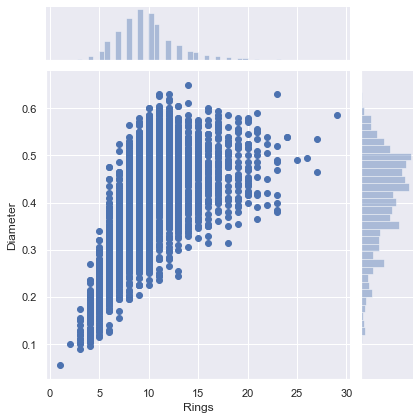

In [140]:
sns.jointplot(x="Rings", y="Diameter", data=data)

# Macierz korelacji

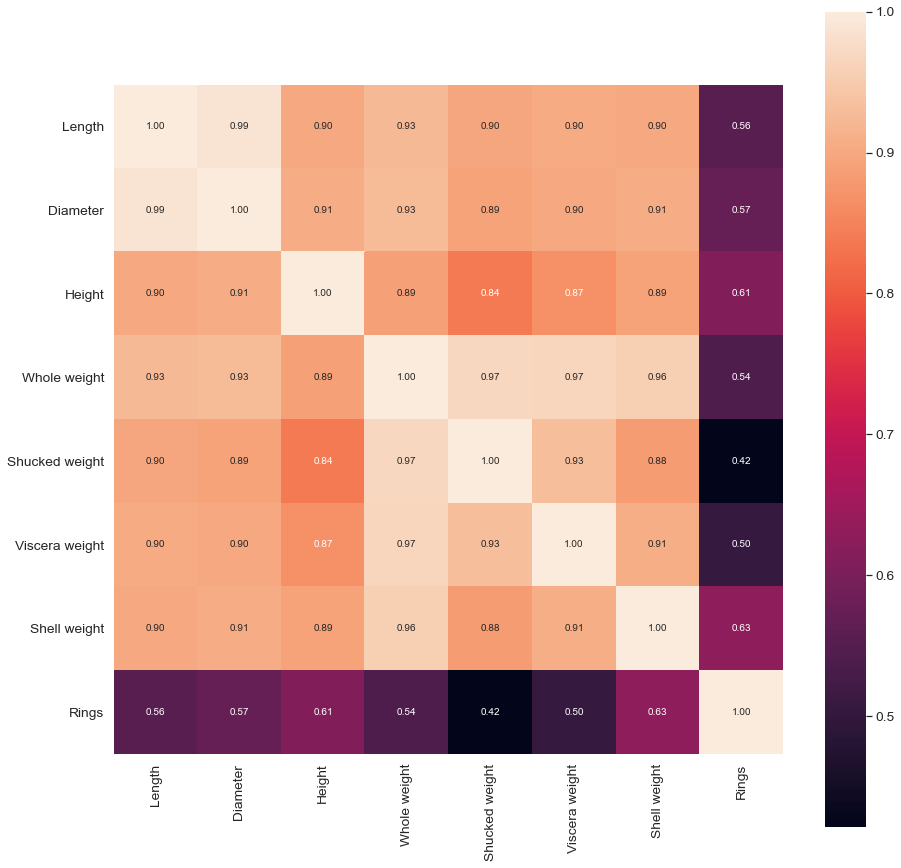

In [141]:
corrmat = data.corr()
cols = corrmat.nlargest(8, 'Rings')['Rings'].index
cm = np.corrcoef(data[nf].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=nf.values, xticklabels=nf.values)
plt.show()

Im bliższy 1, tym niższy jest stopień wzajemnego skorelowania zmiennych objaśniających. Im bliższy 0, tym siła tej korelacji większa.
Cała waga jest prawie liniowo skorelowana ze wszystkimi cechami oprócz pierścieni.
Długość jest liniowo skorelowana ze średnicą.
Wysokość jest najmniej skorelowana z innymi cechami.

Tak wysokie współczynniki korelacji między cechami mogą prowadzić do wielokoliniowośći. 



# Wizualizacja płci i pierścieni

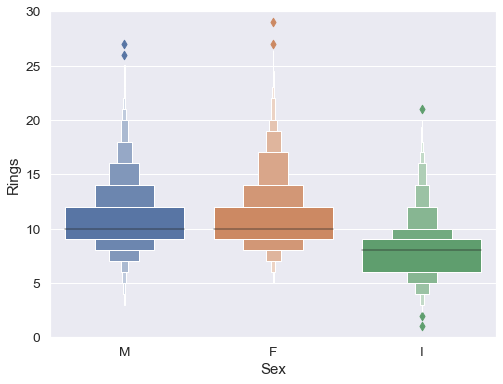

In [142]:
data1 = pd.concat([data['Rings'], data['Sex']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='Sex', y="Rings", data=data)
fig.axis(ymin=0, ymax=30);

- Rozkład między mężczyznami i kobietami jest podobny
- Większość pierścieni zarówno dla mężczyzn, jak i kobiet ma od 8 do 19 lat
- Niemowlęta mają głównie od 5 do 10 pierścieni
- Większość pierścieni leży między 3 a 22, jak wspomniano wcześniej.

# Wstępne przetwarzanie danych dla modelu

In [143]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [144]:
i=[]
for x in range(0,173):
    i.append(x)   

In [145]:
data.drop(i,axis=0,inplace= True)
data = pd.get_dummies(data)

In [146]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
173,0.520,0.405,0.115,0.7760,0.3200,0.1845,0.2200,8,1,0,0
174,0.235,0.160,0.040,0.0480,0.0185,0.0180,0.0150,5,0,1,0
175,0.360,0.260,0.090,0.1785,0.0645,0.0370,0.0750,7,0,1,0
176,0.315,0.210,0.060,0.1250,0.0600,0.0375,0.0350,5,0,1,0
177,0.315,0.245,0.085,0.1435,0.0530,0.0475,0.0500,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [147]:
X = data.drop(['Rings'], axis = 1)
y = data['Rings']

In [148]:
def results(accurancy,f1_scors,sensitivity,specificity):
    i=1
    xlabel=[]
    for m in accurancy:
        xlabel.append(i)
        i=i+1 

    sns.barplot(x=xlabel,y=np.array(accurancy))
    plt.title("Accurancy")
    plt.show()
    sns.set()

    i=1
    xlabel=[]
    for m in f1_scors:
        xlabel.append(i)
        i=i+1 

    sns.barplot(x=xlabel,y=np.array(f1_scors))
    plt.title("f1_score")
    plt.show()
    sns.set()

    i=1
    xlabel=[]
    for m in sensitivity:
        xlabel.append(i)
        i=i+1 

    sns.barplot(x=xlabel,y=np.array(sensitivity))
    plt.title("Sensitivity")
    plt.show()
    sns.set()


    i=1
    xlabel=[]
    for m in specificity:
        xlabel.append(i)
        i=i+1 

    sns.barplot(x=xlabel,y=np.array(specificity))
    plt.title("Specificity")
    plt.show()
    sns.set()

# Precyzyjność z pełnym zestawem cech

In [149]:
accurencyFULL=[]
f1FULL=[]

# RandomForestClassifier + FULL

Las losowy (Random forest) lub losowy las decyzyjny (Random decision forest) jest metodą zespołową uczenia maszynowego dla klasyfikacji, regresji i innych zadań, która polega na konstruowaniu wielu drzew decyzyjnych w czasie uczenia i generowaniu klasy, która jest dominantą klas (klasyfikacja) lub przewidywaną średnią (regresja) poszczególnych drzew.

In [150]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

data_minmax = preprocessing.MinMaxScaler().fit_transform(X)

clf = RandomForestClassifier(random_state=4)

cv_method = StratifiedKFold(n_splits=10)


In [151]:
def fittness(data,accurancyMAX,f1MAX):
    accurancy=[]
    f1_scors=[]
    sensitivity=[]
    specificity=[]

    for train, test in cv_method.split(data, y):
        a=clf.fit(data[train], y.iloc[train])
        y_prediction = clf.predict(data[test])
        y_true = y.iloc[test]

        cnf_matrix= confusion_matrix(y_true,y_prediction)
        #sns.heatmap(cnf_matrix, annot=True)
        #plt.show()

        FP = np.logical_and(y_true != y_prediction, y_prediction != -1).sum()  # 9
        FN = np.logical_and(y_true != y_prediction, y_prediction == -1).sum()  # 4
        TP = np.logical_and(y_true == y_prediction, y_true != -1).sum()  # 3
        TN = np.logical_and(y_true == y_prediction, y_true == -1).sum()  # 1

        FP = FP.astype(float)
        FN = FN.astype(float)
        TP = TP.astype(float)
        TN = TN.astype(float)

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        # Precision or positive predictive value
        PPV = TP/(TP+FP)
        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        # False negative rate
        FNR = FN/(TP+FN)
        # False discovery rate
        FDR = FP/(TP+FP)
        # Overall accuracy
        ACC = (TP+TN)/(TP+FP+FN+TN)
        #F1_score
        F1=2*((PPV*TPR)/(PPV+TPR))

        accurancy.append(ACC)
        f1_scors.append(F1)
        sensitivity.append(TPR)
        specificity.append(TNR)
        
    results(accurancy,f1_scors,sensitivity,specificity)
    accurancyMAX.append(max(accurancy))
    f1MAX.append(max(f1_scors))
        

Macierz nieporozumień pokazuje, w jaki sposób twój model klasyfikacji jest mylony podczas prognozowania. Daje nam wgląd nie tylko w błędy popełniane przez klasyfikator, ale co ważniejsze, w jakie rodzaje błędów się pojawiają.

- True Positive: Przewidziałeś pozytywny i to prawda.
- True Negative: Przewidziałeś negatywny i to prawda.
- False Positive (Type 1 Error): Przewidziałeś pozytywny i to nieprawda.
- False Negative (Type 2 Error): Przewidziałeś negatywne i to jest fałsz.

Opisuje się przewidywane wartości jako dodatnie i ujemne, a wartości rzeczywiste jako prawdziwe i fałszywe.

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


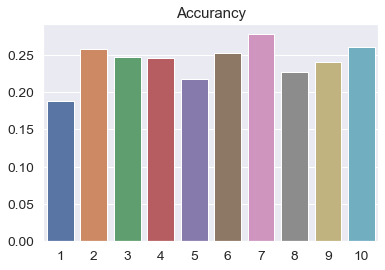

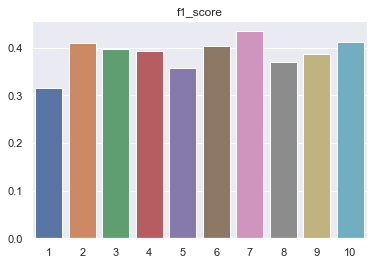

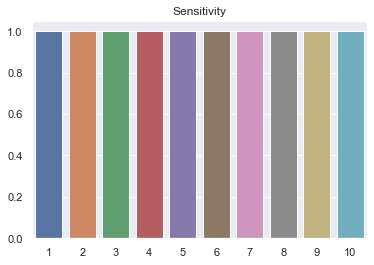

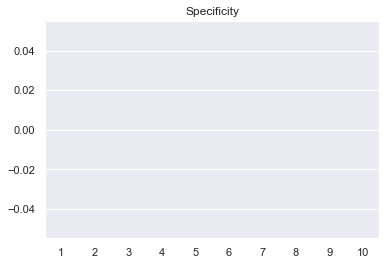

In [152]:
fittness(data_minmax,accurencyFULL,f1FULL)

# MLP + FULL

MLPClassifier oznacza Wielowarstwowy klasyfikator perceptronów, który w samej nazwie łączy się z siecią neuronową. W przeciwieństwie do innych algorytmów klasyfikacji polega na bazowej sieci neuronowej w celu wykonania zadania klasyfikacji.

In [153]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter = 100)

cv_method = StratifiedKFold(n_splits=10)

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

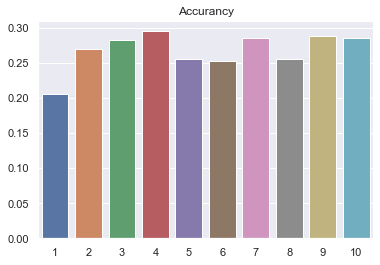

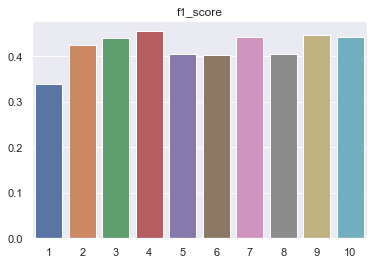

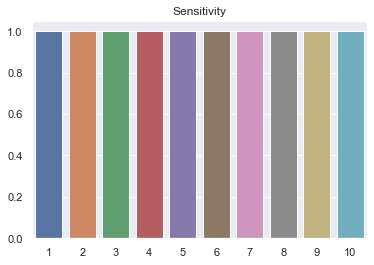

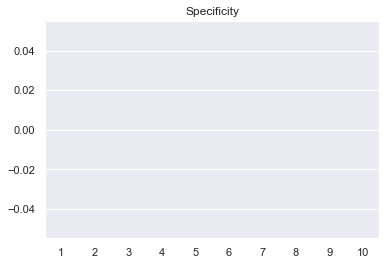

In [154]:
fittness(data_minmax,accurencyFULL,f1FULL)

# Decision tree + FULL

Drzewo decyzyjne jest drzewem, w którym węzły odpowiadają testom przeprowadzanym na wartościach atrybutów reguł, gałęzie są możliwymi wynikami takich testów zaś liście reprezentują część decyzyjną.

In [155]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=4)

cv_method = StratifiedKFold(n_splits=10)

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


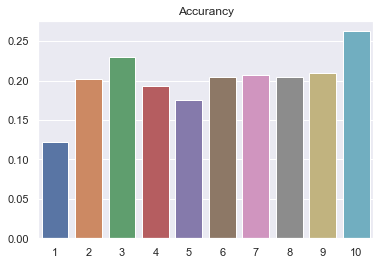

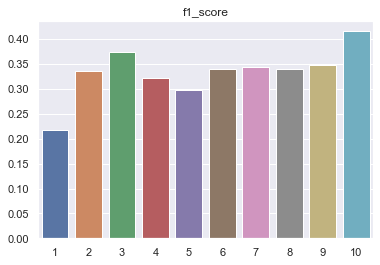

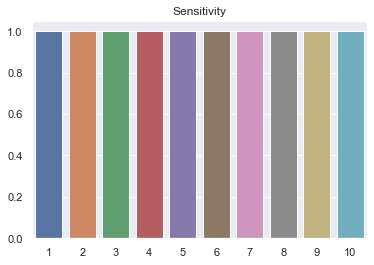

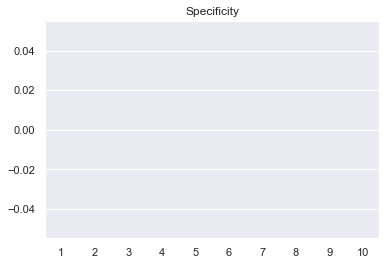

In [156]:
fittness(data_minmax,accurencyFULL,f1FULL)

# SVC +FULL

Maszyna wektorów nośnych, maszyna wektorów podpierających.(ang. Support Vector Machine, SVM) – abstrakcyjny koncept maszyny, która działa jak klasyfikator, a której nauka ma na celu wyznaczenie hiperpłaszczyzny rozdzielającej z maksymalnym marginesem przykłady należące do dwóch klas. Często wykorzystywana niejawnie w procesie rozpoznawania obrazów.

In [157]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

cv_method = StratifiedKFold(n_splits=10)

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


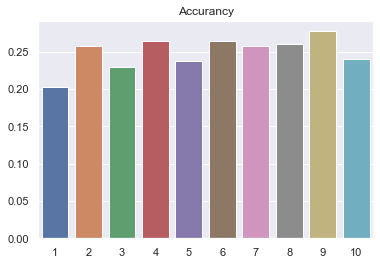

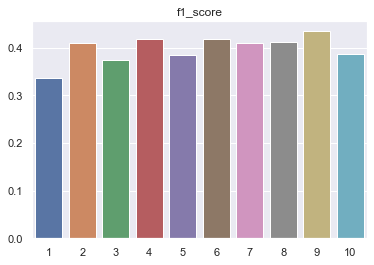

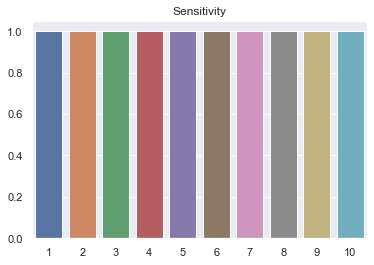

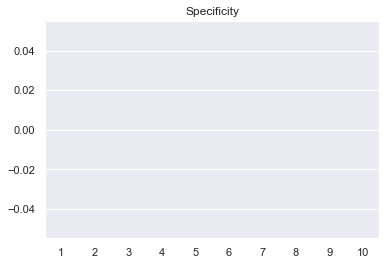

In [158]:
fittness(data_minmax,accurencyFULL,f1FULL)

# Selekcja cech z wykorzystaniem F-Score

Wynik F, zwany także wynikiem F1 lub miarą F, jest miarą dokładności testu.

In [159]:
import sklearn.feature_selection as fs

num_features = 10
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(data_minmax, y)
fs_indices_fscore = np.argsort(fs_fit_fscore.scores_)[::-1][0:num_features]
fs_indices_fscore

array([1, 0, 2, 6, 3, 5, 4, 8, 7, 9], dtype=int32)

In [160]:
best_features_fscore = data.columns[fs_indices_fscore].values
best_features_fscore

array(['Diameter', 'Length', 'Height', 'Shell weight', 'Whole weight',
       'Viscera weight', 'Shucked weight', 'Sex_F', 'Rings', 'Sex_I'],
      dtype=object)

In [161]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([187.8422376 , 180.65263037, 168.06226648, 142.407358  ,
       109.19366484, 100.10246296,  78.51326755,  64.94747872,
        15.02607642,  10.54013656])

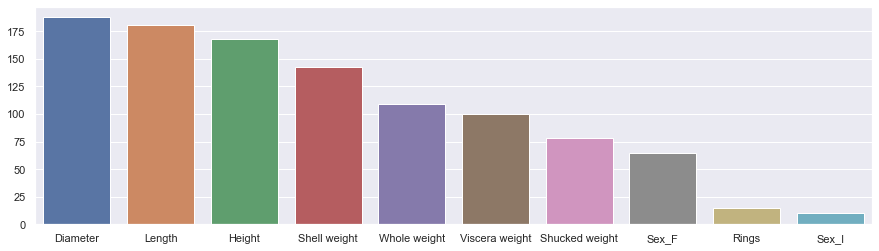

In [162]:
plt.figure(figsize=(15,4))
sns.barplot(x=best_features_fscore,y=feature_importances_fscore)
plt.show()
sns.set()

# Selekcja cech z wykorzystaniem Random Forest Importance

Random Forest Importance należy do najpopularniejszych metod uczenia maszynowego dzięki ich stosunkowo dobrej dokładności, solidności i łatwości użytkowania. Zapewniają dwie proste metody wyboru cech: średni spadek nieczystośći i średni spadek dokładności.

In [163]:
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(data_minmax, y)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]
fs_indices_rfi

array([6, 4, 3, 5, 1, 0, 2, 9, 7, 8], dtype=int32)

In [164]:
best_features_rfi = data.columns[fs_indices_rfi].values
best_features_rfi


array(['Shell weight', 'Shucked weight', 'Whole weight', 'Viscera weight',
       'Diameter', 'Length', 'Height', 'Sex_I', 'Rings', 'Sex_F'],
      dtype=object)

In [165]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.16325591, 0.15417647, 0.1515557 , 0.14919253, 0.11397907,
       0.11395093, 0.10325498, 0.01812215, 0.01691739, 0.01559485])

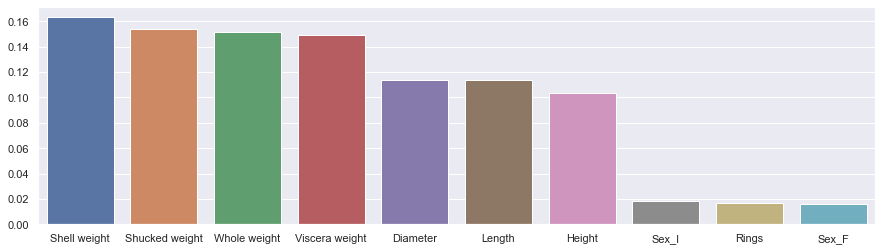

In [166]:
plt.figure(figsize=(15,4))
sns.barplot(x=best_features_rfi,y=feature_importances_rfi)
plt.show()
sns.set()

# PCA

jedna ze statystycznych metod analizy czynnikowej. Zbiór danych składający się z N obserwacji, z których każda obejmuje K zmiennych, można interpretować jako chmurę N punktów w przestrzeni K-wymiarowej. 

Celem PCA jest taki obrót układu współrzędnych, aby maksymalizować w pierwszej kolejności wariancję pierwszej współrzędnej, następnie wariancję drugiej współrzędnej itd.. Tak przekształcone wartości współrzędnych nazywane są ładunkami wygenerowanych czynników (składowych głównych). W ten sposób konstruowana jest nowa przestrzeń obserwacji, w której najwięcej zmienności wyjaśniają początkowe czynniki.

In [167]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [168]:
corr_mat = np.corrcoef(X_std.T)

In [169]:
eigenvalues, eigenvectors = np.linalg.eig(corr_mat)
print('\nEigenvalues \n%s' %eigenvalues)


Eigenvalues 
[7.06534601e+00 1.51132506e+00 9.05948035e-01 2.13143569e-01
 1.35832619e-01 8.64208600e-02 6.27049542e-02 1.26772477e-02
 6.60163832e-03 6.18637981e-16]


In [170]:
# Lista krotek (wartość własna, wektor własny).  
pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
pairs.sort(key = lambda x: x[0], reverse = True)

In [171]:
sorted_eigenval = []
for i in pairs:
    sorted_eigenval.append(i[0])
    print(i[0])

7.065346013110182
1.5113250631047135
0.9059480353183891
0.21314356944380117
0.1358326189146691
0.08642085995200569
0.06270495417242375
0.012677247661578113
0.006601638322233335
6.186379811180141e-16


In [172]:
total = sum(eigenvalues)
variance_explained = [(i/total)*100 for i in sorted_eigenval]

In [173]:
variance_explained = [(i/total)*100 for i in sorted_eigenval]

In [174]:
cum_variance_explained = np.cumsum(variance_explained)
cum_variance_explained

array([ 70.65346013,  85.76671076,  94.82619112,  96.95762681,
        98.315953  ,  99.1801616 ,  99.80721114,  99.93398362,
       100.        , 100.        ])

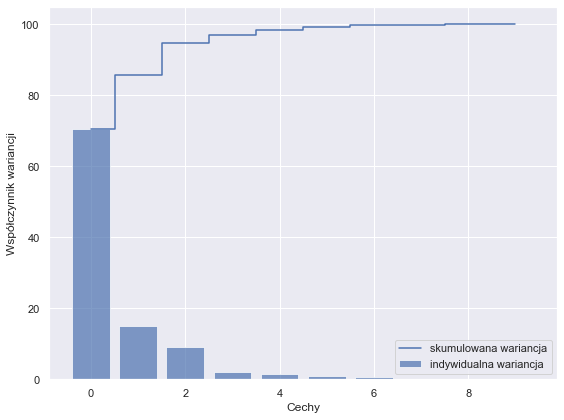

In [175]:
plt.figure(figsize=(8, 6))
plt.bar(range(10), variance_explained, alpha=0.7, align='center',label='indywidualna wariancja')
plt.step(range(10), cum_variance_explained, where='mid',label='skumulowana wariancja')
plt.ylabel('Współczynnik wariancji')
plt.xlabel('Cechy')
plt.legend(loc='best')
plt.tight_layout()

Z powyższego wykresu widzimy, że pierwsze trzy cechy mogą wyjaśnić ponad 94.74969086% zmienności zmiennych cech. Daltego możemy usunąć pozostałe elementy.

In [176]:
data_pca= data.copy()
data_pca.drop(data_pca.columns[[3,4,5,6,7,8,9,10]], axis=1, inplace=True)

In [177]:
data_pca=data_pca.values

# Klasyfikacja

In [178]:
accurancyRFI=[]
f1RFI=[]

# RandomForestClassifier + RFI

In [179]:
data.columns[fs_indices_rfi[:5]]

Index(['Shell weight', 'Shucked weight', 'Whole weight', 'Viscera weight',
       'Diameter'],
      dtype='object')

In [180]:
data_minmax_df = pd.DataFrame(data = data_minmax,columns = X.columns)
data_rfi = data_minmax_df[data.columns[fs_indices_rfi[:5]].values]
data_rfi = data_rfi.values

In [181]:

cv_method = StratifiedKFold(n_splits=10)

clf = RandomForestClassifier(random_state=4)

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


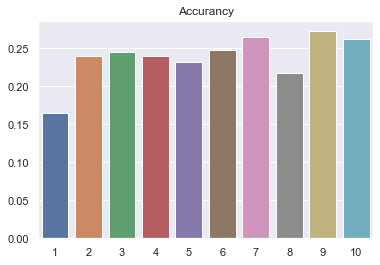

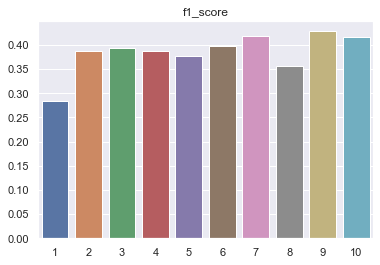

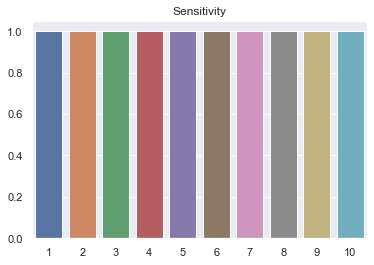

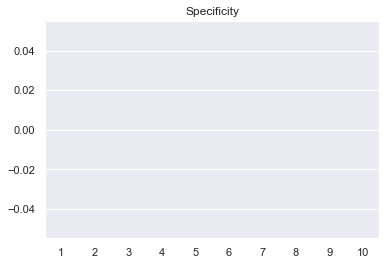

In [182]:
fittness(data_rfi,accurancyRFI,f1RFI)

# MLP + RFI

In [183]:
clf = MLPClassifier(max_iter = 100)

cv_method = StratifiedKFold(n_splits=10)

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

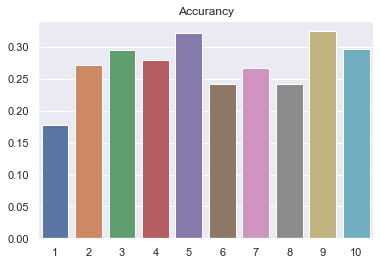

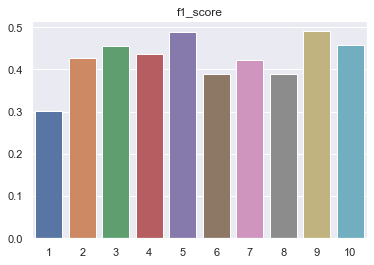

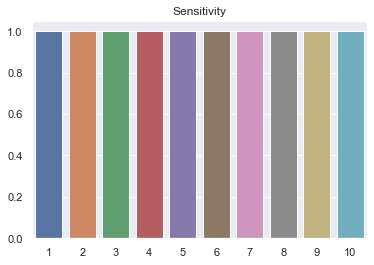

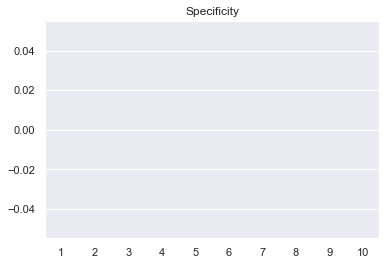

In [184]:
fittness(data_rfi,accurancyRFI,f1RFI)

# Decision Tree Classifier + RFI


In [185]:
clf = DecisionTreeClassifier(random_state=4)

cv_method = StratifiedKFold(n_splits=10)

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


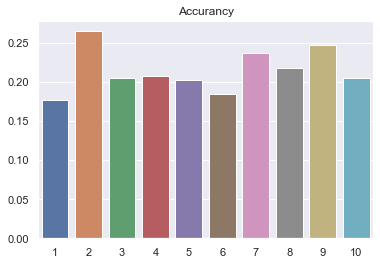

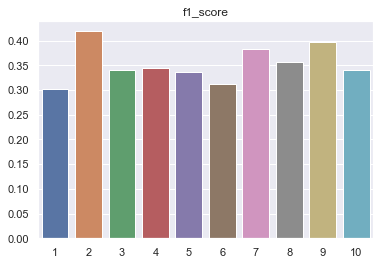

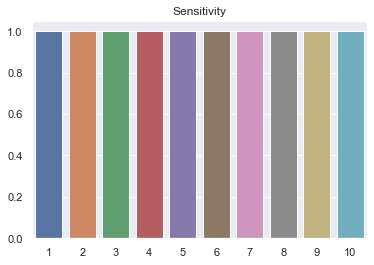

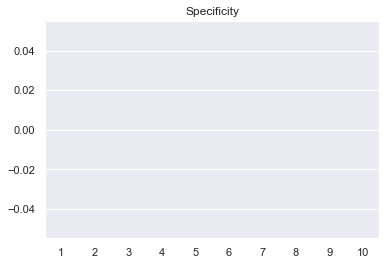

In [186]:
fittness(data_rfi,accurancyRFI,f1RFI)

# SVC + RFI

In [187]:
cv_method = StratifiedKFold(n_splits=10)

clf = svm.SVC(kernel='linear')

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


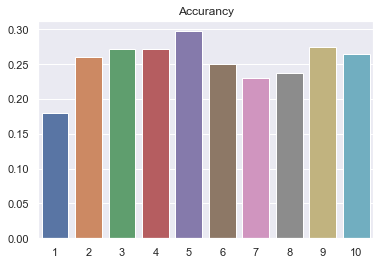

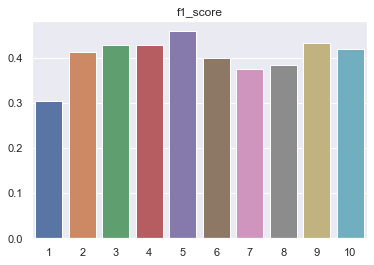

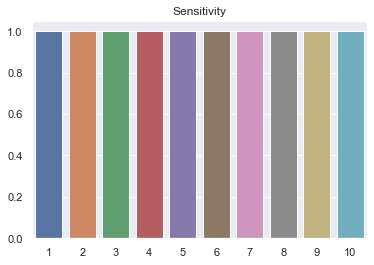

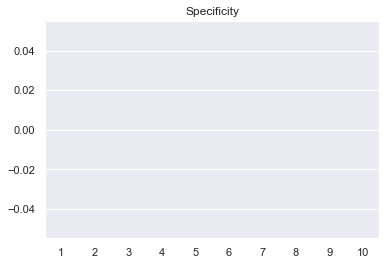

In [188]:
fittness(data_rfi,accurancyRFI,f1RFI)

# Random Forest Classifier + FS

In [189]:
accurancyFS=[]
f1FS=[]

In [190]:
data.columns[fs_indices_fscore[:5]]

Index(['Diameter', 'Length', 'Height', 'Shell weight', 'Whole weight'], dtype='object')

In [191]:
data_minmax_df = pd.DataFrame(data = data_minmax,columns = X.columns)
data_fscore = data_minmax_df[data.columns[fs_indices_fscore[:5]].values]
data_fscore = data_fscore.values

In [192]:
cv_method = StratifiedKFold(n_splits=10)

clf = RandomForestClassifier(random_state=4)

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


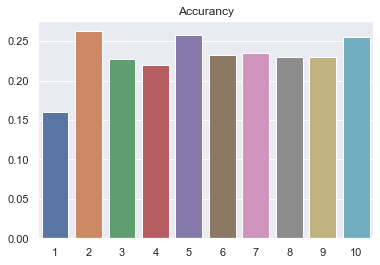

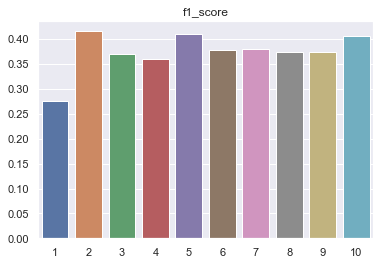

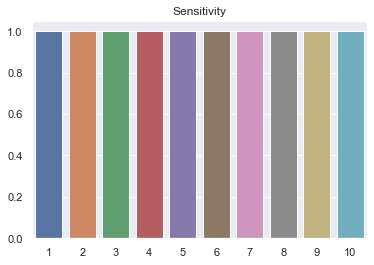

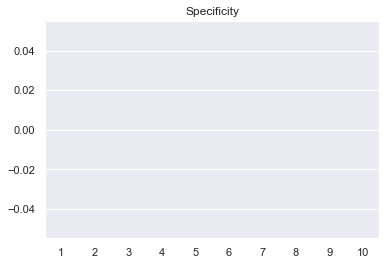

In [193]:
fittness(data_fscore,accurancyFS,f1FS)

# MLP + FS

In [194]:
clf = MLPClassifier(max_iter = 100)

cv_method = StratifiedKFold(n_splits=10)

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

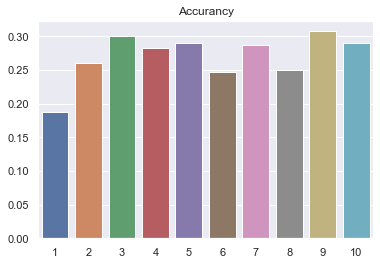

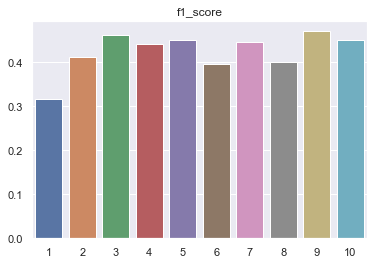

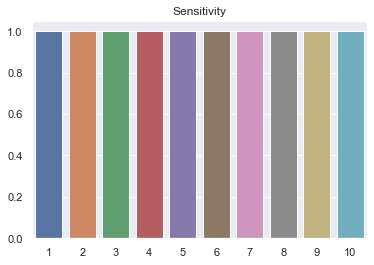

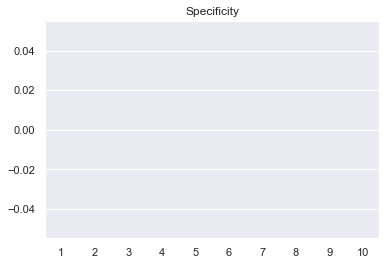

In [195]:
fittness(data_fscore,accurancyFS,f1FS)

# Decision Tree Classifier + FS

In [196]:
clf = DecisionTreeClassifier(random_state=4)

cv_method = StratifiedKFold(n_splits=10)

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


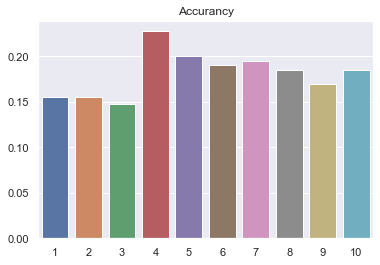

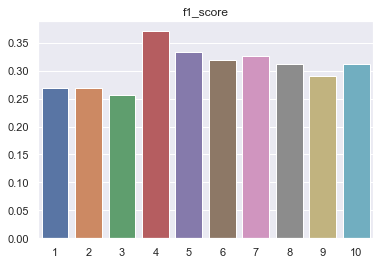

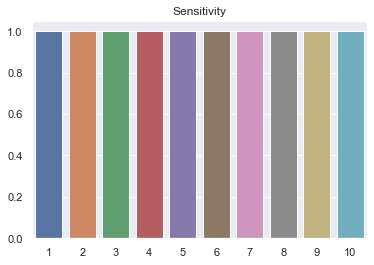

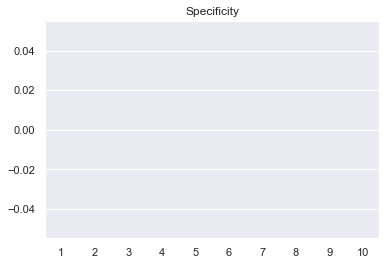

In [197]:
fittness(data_fscore,accurancyFS,f1FS)

# SVC + FS

In [198]:
clf = svm.SVC(kernel='linear')

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


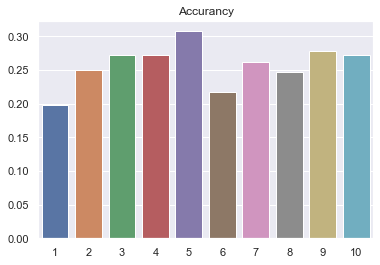

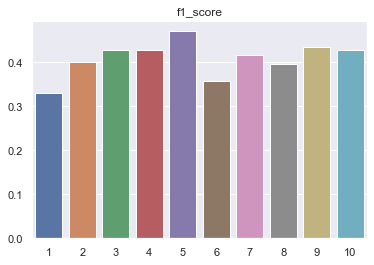

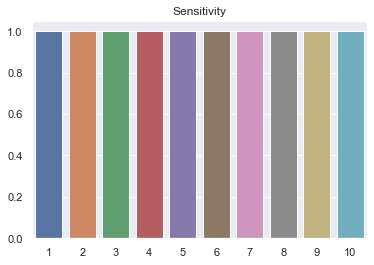

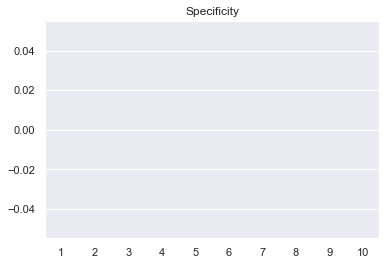

In [199]:
fittness(data_fscore,accurancyFS,f1FS)

# Random Forest Classifier + PCA

In [200]:
accurancyPCA=[]
f1PCA=[]

In [201]:
clf = MLPClassifier(max_iter = 100)

cv_method = StratifiedKFold(n_splits=10)

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

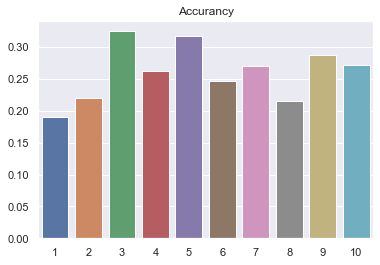

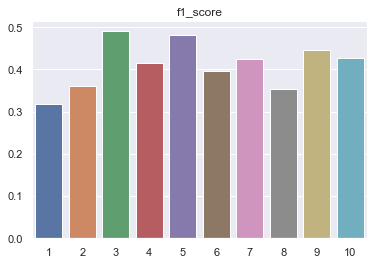

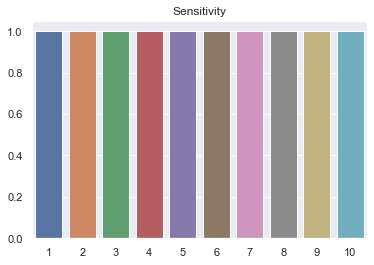

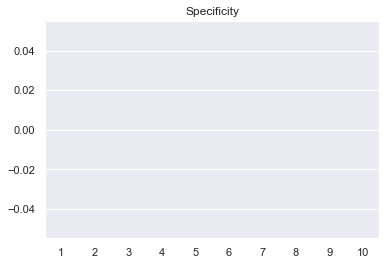

In [202]:
fittness(data_pca,accurancyPCA,f1PCA)

# MLP + PCA


In [203]:
clf = MLPClassifier(max_iter = 100)

cv_method = StratifiedKFold(n_splits=10)

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

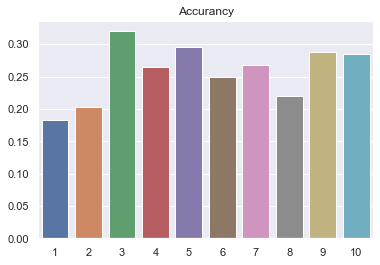

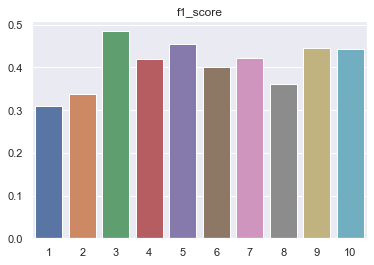

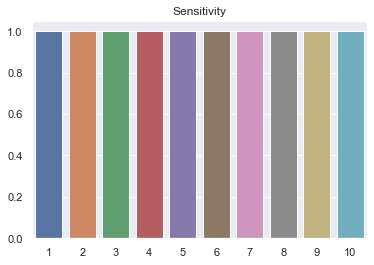

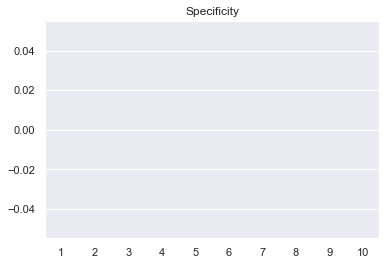

In [204]:
fittness(data_pca,accurancyPCA,f1PCA)

# Decision Tree Classifier + PCA

In [205]:
clf = DecisionTreeClassifier(random_state=4)

cv_method = StratifiedKFold(n_splits=10)

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


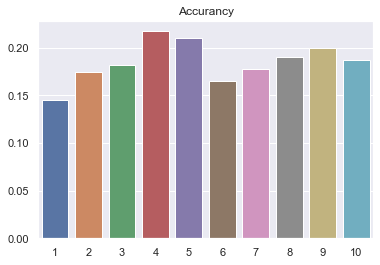

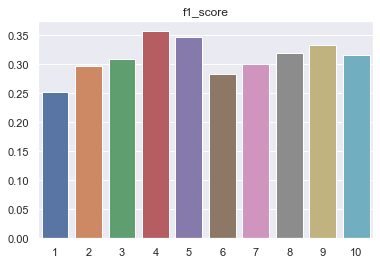

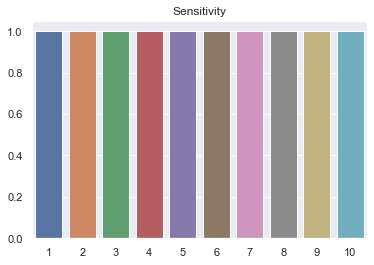

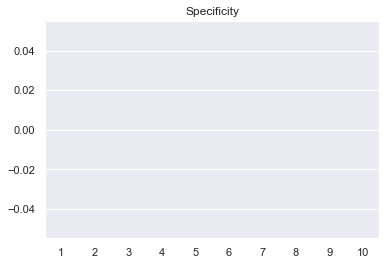

In [206]:
fittness(data_pca,accurancyPCA,f1PCA)

# SVC + PCA

In [207]:
clf = svm.SVC(kernel='linear')

c:\users\dominika\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


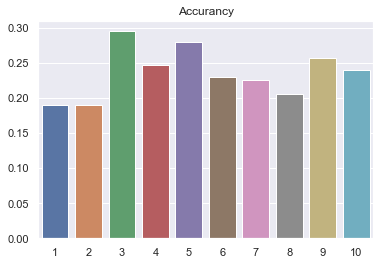

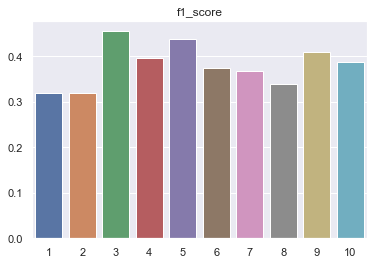

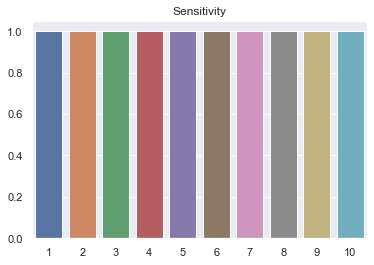

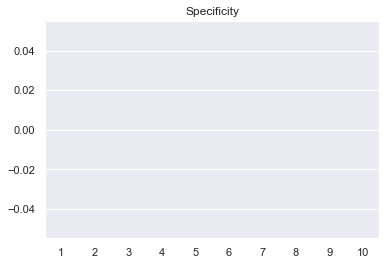

In [208]:
fittness(data_pca,accurancyPCA,f1PCA)

In [209]:
len(data_minmax[0])

10

# Optymalizacja cech za pomocą algorytmu genetycznego

Źródło: https://www.kdnuggets.com/2019/03/feature-reduction-genetic-algorithm-python.html/2

In [210]:
def reduce_features(solution, features):

    selected_elements_indices = numpy.where(solution == 1)[0]

    reduced_features = features[:, selected_elements_indices]

    return reduced_features



def classification_accuracy(labels, predictions):

    correct = numpy.where(labels == predictions)[0]

    accuracy = correct.shape[0]/labels.shape[0]

    return accuracy



def cal_pop_fitness(pop, features, labels, train_indices, test_indices):

    accuracies = numpy.zeros(pop.shape[0])

    idx = 0



    for curr_solution in pop:

        reduced_features = reduce_features(curr_solution, features)

        train_data = reduced_features[train_indices, :]

        test_data = reduced_features[test_indices, :]



        train_labels = labels.iloc[train_indices]

        test_labels = labels.iloc[test_indices]



        SV_classifier = svm.SVC(gamma='scale')

        SV_classifier.fit(X=train_data, y=train_labels)



        predictions = SV_classifier.predict(test_data)

        accuracies[idx] = classification_accuracy(test_labels, predictions)

        idx = idx + 1

    return accuracies



def select_mating_pool(pop, fitness, num_parents):

    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.

    parents = numpy.empty((num_parents, pop.shape[1]))

    for parent_num in range(num_parents):

        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))

        max_fitness_idx = max_fitness_idx[0][0]

        parents[parent_num, :] = pop[max_fitness_idx, :]

        fitness[max_fitness_idx] = -99999999999

    return parents



def crossover(parents, offspring_size):

    offspring = numpy.empty(offspring_size)

    # The point at which crossover takes place between two parents. Usually, it is at the center.

    crossover_point = numpy.uint8(offspring_size[1]/2)



    for k in range(offspring_size[0]):

        # Index of the first parent to mate.

        parent1_idx = k%parents.shape[0]

        # Index of the second parent to mate.

        parent2_idx = (k+1)%parents.shape[0]

        # The new offspring will have its first half of its genes taken from the first parent.

        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]

        # The new offspring will have its second half of its genes taken from the second parent.

        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]

    return offspring



def mutation(offspring_crossover, num_mutations=2):

    mutation_idx = numpy.random.randint(low=0, high=offspring_crossover.shape[1], size=num_mutations)

    # Mutation changes a single gene in each offspring randomly.

    for idx in range(offspring_crossover.shape[0]):

        # The random value to be added to the gene.

        offspring_crossover[idx, mutation_idx] = 1 - offspring_crossover[idx, mutation_idx]

    return offspring_crossover


Number of training samples:  1000
Number of test samples:  1000
(8, 10)
Generation :  0
Best result :  0.255
Generation :  1
Best result :  0.258
Generation :  2
Best result :  0.258
Generation :  3
Best result :  0.258
Generation :  4
Best result :  0.258
Generation :  5
Best result :  0.265
Generation :  6
Best result :  0.265
Generation :  7
Best result :  0.265
Generation :  8
Best result :  0.265
Generation :  9
Best result :  0.265
Generation :  10
Best result :  0.265
Generation :  11
Best result :  0.271
Generation :  12
Best result :  0.271
Generation :  13
Best result :  0.271
Generation :  14
Best result :  0.271
Generation :  15
Best result :  0.276
Generation :  16
Best result :  0.276
Generation :  17
Best result :  0.276
Generation :  18
Best result :  0.276
Generation :  19
Best result :  0.276
Generation :  20
Best result :  0.276
Generation :  21
Best result :  0.276
Generation :  22
Best result :  0.276
Generation :  23
Best result :  0.276
Generation :  24
Best resu

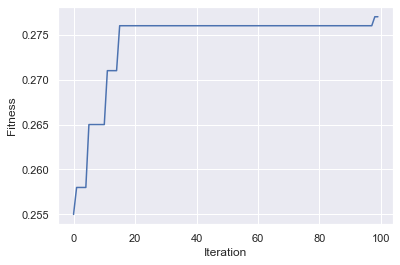

In [211]:
import numpy
import pickle
import matplotlib.pyplot


data_inputs = data_minmax

data_outputs = y


num_samples = data_inputs.shape[0]
num_feature_elements = data_inputs.shape[1]

train_indices = numpy.arange(1, num_samples, 4)
test_indices = numpy.arange(0, num_samples, 4)
print("Number of training samples: ", train_indices.shape[0])
print("Number of test samples: ", test_indices.shape[0])

"""
Genetic algorithm parameters:
    Population size
    Mating pool size
    Number of mutations
"""
sol_per_pop = 8 # Population size.
num_parents_mating = 4 # Number of parents inside the mating pool.
num_mutations = 3 # Number of elements to mutate.

# Defining the population shape.
pop_shape = (sol_per_pop, num_feature_elements)

# Creating the initial population.
new_population = numpy.random.randint(low=0, high=2, size=pop_shape)
print(new_population.shape)

best_outputs = []
num_generations = 100
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)

    best_outputs.append(numpy.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", best_outputs[-1])

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_shape[0]-parents.shape[0], num_feature_elements))

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=num_mutations)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))[0]
best_match_idx = best_match_idx[0]

best_solution = new_population[best_match_idx, :]
best_solution_indices = numpy.where(best_solution == 1)[0]
best_solution_num_elements = best_solution_indices.shape[0]
best_solution_fitness = fitness[best_match_idx]

print("best_match_idx : ", best_match_idx)
print("best_solution : ", best_solution)
print("Selected indices : ", best_solution_indices)
print("Number of selected elements : ", best_solution_num_elements)
print("Best solution fitness : ", best_solution_fitness)

matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

Jak widać algorytm genetyczny pomógł w optymalizacji parametrów ,ale w małym stopniu (0,255-0,277=0,22) 

# Podsumowanie

Ocena działania algorytmów została wykonana na podstawie parametrów ACC oraz F1_Score wyznaczonych na podstawie macierzy pomyłek.

In [220]:
def accurencyF1Plot(data,title):
    sns.barplot(x=["RF","MLP","DT","SVC"],y=np.array(data))
    plt.title(title)
    plt.show()
    sns.set()

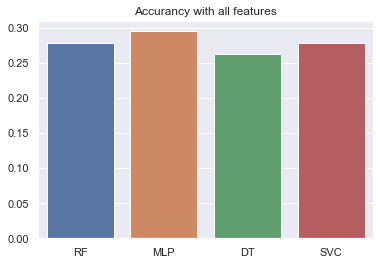

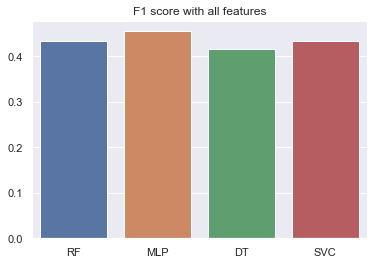

In [226]:
accurencyF1Plot(accurencyFULL,"Accurancy with all features")
accurencyF1Plot(f1FULL,"F1 score with all features")

W przypadku całej gamy cech wygrywa klasyfikator MLP z wynikiem bliskim 30%(Accuracy), ale równice miezy nim a innymi algorymami są stosunkowo małe.

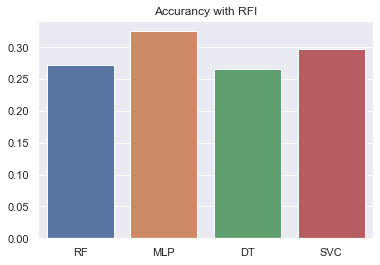

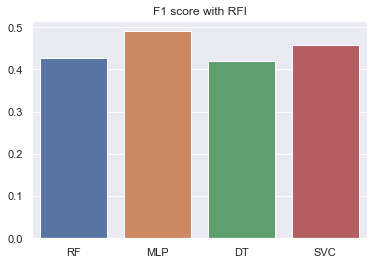

In [227]:
accurencyF1Plot(accurancyRFI,"Accurancy with RFI")
accurencyF1Plot(f1RFI,"F1 score with RFI")

Tutaj wygrywa również MLP.

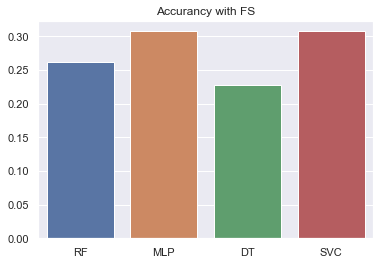

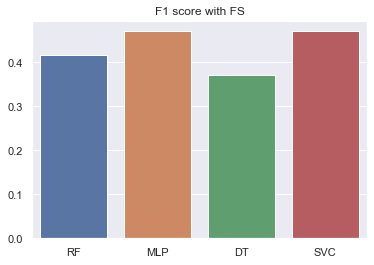

In [228]:
accurencyF1Plot(accurancyFS,"Accurancy with FS")
accurencyF1Plot(f1FS,"F1 score with FS")

W tym przypadku MLP i SVC mają tą samą dokładność.

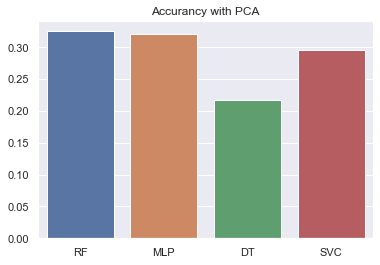

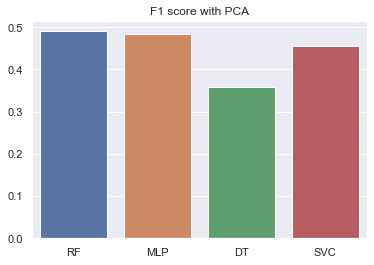

In [229]:
accurencyF1Plot(accurancyPCA,"Accurancy with PCA")
accurencyF1Plot(f1PCA,"F1 score with PCA")

W tym przypadku MLP i SVC mają tą podobną dokładność ,ale RF wygrywa.

In [ ]:
Podsumowując wszystkie próby klasyfikator MLP spisał się najlepiej. 

Accuracy - jest najbardziej intuicyjną miarą wydajności i jest po prostu stosunkiem prawidłowo przewidywanej obserwacji do łącznej liczby obserwacji. Można pomyśleć, że jeśli mamy wysoką dokładność, nasz model jest dobry. Dokładność jest świetną miarą, ale tylko wtedy, gdy mamy symetryczne zestawy danych, w których wartości false positive i false negatives są prawie takie same. Dlatego musimy patrzeć na inne parametry, aby ocenić wydajność swojego modelu. Problem z użyciem dokładności jako głównej miary wydajności polega na tym, że nie radzi sobie ona dobrze, gdy występują poważne braki równowagi rozkład. W naszym przypadku dokładnośc oscyluje około 30% czyli jest dość niska.
- „jak dokładny jest ten model?”
- „To skomplikowane”.

F1 to średnia ważona Precission i Recall. Dlatego ten wynik uwzględnia zarówno false positives oraz false negatives. F1 jest zwykle bardziej przydatna niż dokładność, szczególnie jeśli masz nierównomierny rozkład. Dokładność działa najlepiej, jeśli false positives i false negatives mają podobny koszt. Jeśli koszt  false positives i false negatives jest bardzo różny, lepiej przyjrzeć się zarówno Precission i Recall. F1 jest uważany za idealny, gdy jest równy 1, podczas gdy model jest całkowitą porażką, gdy jest 0, moje modele są poprostu ok, w taki porównaniu.